### Load GeometricIntegrators.jl Library

In [1]:
using GeometricIntegrators
using GeometricIntegrators.Integrators: integrate_step!

### Define Equations

In [2]:
const k = 0.5;

In [3]:
function v(t, x, v, κ)
    v[1] = x[2]
    v[2] = -κ*x[1]
    nothing
end

v (generic function with 1 method)

In [4]:
function hamiltonian(t, q, κ)
    q[2]^2 / 2 + κ * q[1]^2 / 2
end

hamiltonian (generic function with 1 method)

In [5]:
t₀=0.0
q₀=[0.5, 0.0]
;

In [6]:
ode = ODE((t,q,dq) -> v(t,q,dq,k), t₀, q₀)

ODE{Float64,Float64,var"#3#4",Nothing,Nothing,1}(2, 1, var"#3#4"(), nothing, 0.0, [0.5, 0.0], nothing, [0.0, 0.0])

### Create Integrator

In [7]:
Δt = 0.1;

In [8]:
tab = getTableauERK4()
#tab = getTableauImplicitMidpoint()

TableauERK{Float64}(:erk4, 4, 4, Runge-Kutta Coefficients erk4 with 4 stages and order 4  a = [0.0 0.0 0.0 0.0; 0.5 0.0 0.0 0.0; 0.0 0.5 0.0 0.0; 0.0 0.0 1.0 0.0]  b = [0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666]  c = [0.0, 0.5, 0.5, 1.0])

In [9]:
int = Integrator(ode, tab, Δt)

IntegratorERK{Float64,Float64,GeometricIntegrators.Integrators.ParametersERK{Float64,Float64,ODE{Float64,Float64,var"#3#4",Nothing,Nothing,1},2,4},2,4}(GeometricIntegrators.Integrators.ParametersERK{Float64,Float64,ODE{Float64,Float64,var"#3#4",Nothing,Nothing,1},2,4}(ODE{Float64,Float64,var"#3#4",Nothing,Nothing,1}(2, 1, var"#3#4"(), nothing, 0.0, [0.5, 0.0], nothing, [0.0, 0.0]), TableauERK{Float64}(:erk4, 4, 4, Runge-Kutta Coefficients erk4 with 4 stages and order 4  a = [0.0 0.0 0.0 0.0; 0.5 0.0 0.0 0.0; 0.0 0.5 0.0 0.0; 0.0 0.0 1.0 0.0]  b = [0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666]  c = [0.0, 0.5, 0.5, 1.0]), 0.1), GeometricIntegrators.Integrators.IntegratorCacheERK{Float64,2,4}(Array{Float64,1}[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]], Array{Float64,1}[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]))

### Create Solution

In [10]:
nt = 100;

In [11]:
nq = 10;

In [12]:
q = zeros(2, nq, nt+1)
q[:,:,1] .= rand(2,nq)

2×10 view(::Array{Float64,3}, :, :, 1) with eltype Float64:
 0.754629  0.00839744  0.706606  0.925014  …  0.821037  0.00368999  0.658948 
 0.900519  0.501183    0.974754  0.91638      0.101142  0.655087    0.0725175

In [13]:
t = collect(range(0, stop=Δt*nt, step=Δt));

In [14]:
sol = AtomicSolution(ode)

AtomicSolutionODE{Float64,Float64}(0.0, 0.0, [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0])

### Integrate

In [15]:
for i in 1:nt
    sol.t = t[i+1]
    for k in 1:nq
        sol.q .= q[:,k,i]
        integrate_step!(int, sol)
        q[:,k,i+1] .= sol.q
    end
end

### Plot Solution

In [16]:
using Plots

In [17]:
include("pic_plot_recipes.jl")

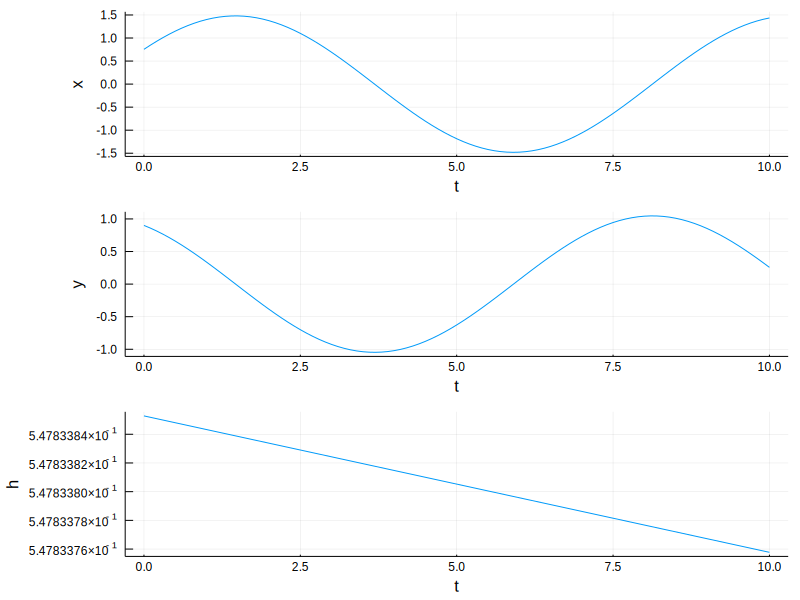

In [18]:
plotoscillator(t, q[:,1,:])

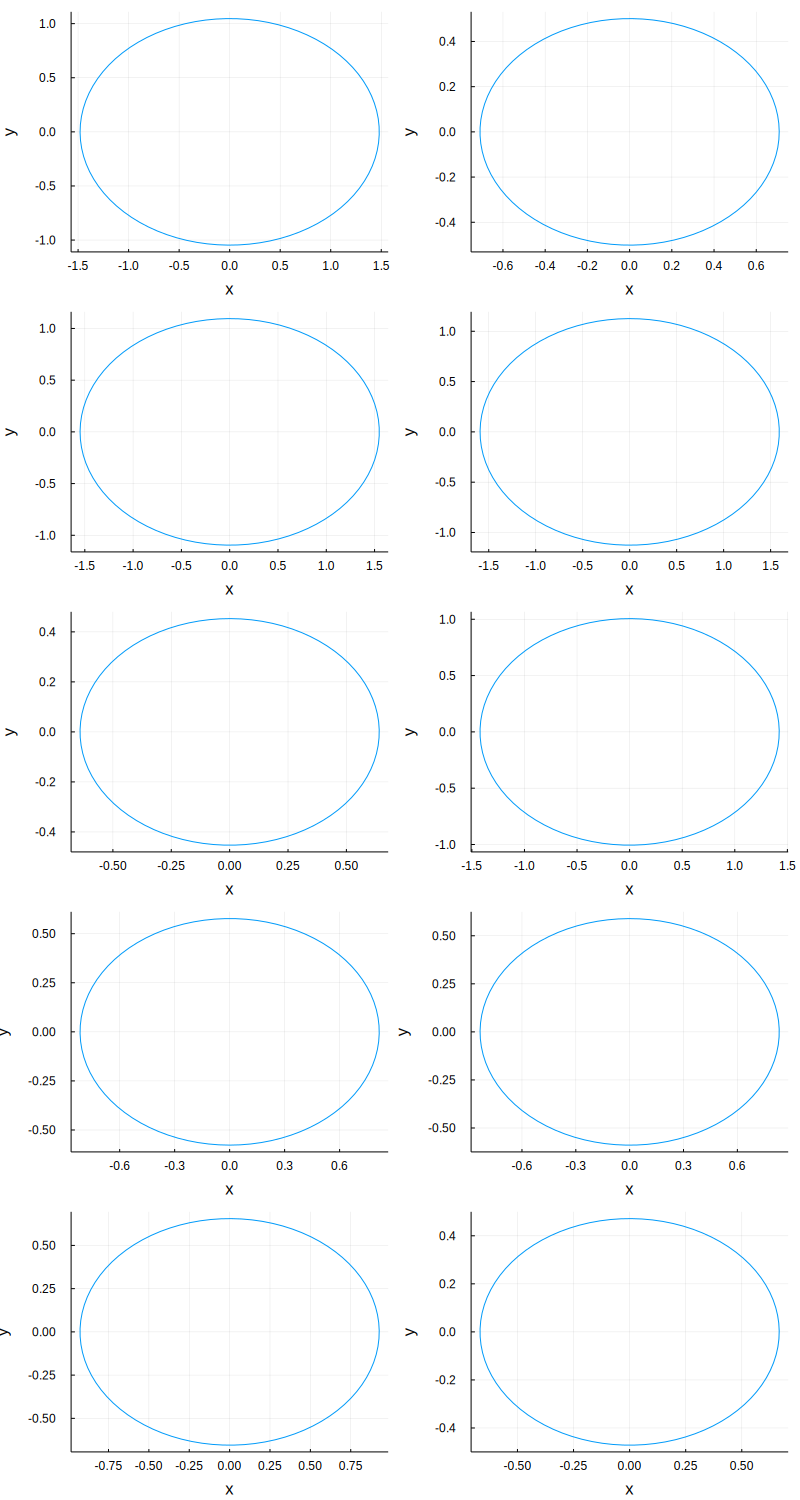

In [19]:
plotoscillatoroverview(q)